In [1]:
import sys, os
helper_py_location = os.path.abspath(os.path.join(os.path.join(os.getcwd(), "../..") ,"src","helper"))
# print(helper_py_location)
sys.path.append(helper_py_location)

In [2]:
import helper
HF_returns_original = helper.load_data('HW_Hedge_Fund.xlsx',1)
M_ER_country_original = helper.load_data('HW_World.xlsx')
Emp_factors_original = helper.load_data('HW_Factors.xlsx')
HP_DJ_Sto_original = helper.load_data('HW_DJIA_Prices.xlsx',4)

#clean
HF_returns =HF_returns_original.copy()
Emp_factors = Emp_factors_original.copy()
M_ER_country = M_ER_country_original.copy()
HP_DJ_Sto = HP_DJ_Sto_original.copy()

Emp_factors.iloc[:, 1:] = Emp_factors.iloc[:, 1:].div(100)
M_ER_country.iloc[:,1:] = M_ER_country.iloc[:,1:].div(100)
Emp_factors.rename(columns={Emp_factors.keys()[0]: 'Date'}, inplace=True)

# print(HF_returns_original.keys())
# print(M_ER_country_original.keys())
# print(Emp_factors_original.keys())     
# print(HP_DJ_Sto_original.keys())


Investigate whether long term momentum profits in equity markets across 20 developed countries.

Strategy 1 sort 

In [5]:
import numpy as np
import pandas as pd
cum_return_36M = pd.DataFrame()
cum_return_36M = M_ER_country.copy()
cum_return_36M.iloc[:, 1:] = M_ER_country.iloc[:, 1:].rolling(window=36).apply(lambda x: np.prod(x + 1))
# cum_return
cum_return_3M = pd.DataFrame()
cum_return_3M = M_ER_country.copy()
cum_return_3M.iloc[:, 1:] = M_ER_country.iloc[:, 1:].rolling(window=3).apply(lambda x: np.prod(x + 1))


In [46]:
inital_position = 100_000
Look_back_period = 36
start_date = 199312 # 35row
def Invest_Portfolio(cum_return_long, t): #first 4 short, last 4 long
    # print(cum_return_long.iloc[t],'/t')
    sorted_cum = cum_return_long.iloc[t].sort_values()
    # print(sorted_cum,'\n')
    portfolio_strategy = sorted_cum.index[:4].tolist() + sorted_cum.index[-4:].tolist()
    
    # print(portfolio_strategy)
    return portfolio_strategy

def cum_return_x_Month(start_Value: float, cum_return_xM : pd.DataFrame):
    import pandas as pd
    # print(start_Value)
    # print(cum_return_xM)
    each = start_Value/cum_return_xM.shape[0]
    # print(cum_return_xM)
    first_4 = (each * (2-cum_return_xM.iloc[:4, ])).sum()
    last_4 =  (each * + cum_return_xM.iloc[-4:,]).sum()
    # print(first_4 , last_4)
    endValue = first_4 + last_4
    return endValue
#initialize
all_st_values = []
t = 35
st_value = inital_position
all_st_values.append(inital_position)

#rebalancing
while t < len(cum_return_36M) - 3:
    Short_Long_list = Invest_Portfolio(cum_return_36M.iloc[:,1:], t)
    # print(cum_return_36M.loc[t, Short_Long_list])
    t += 3
    st_value = cum_return_x_Month(st_value, cum_return_3M.loc[t, Short_Long_list])
    all_st_values.append(st_value)

# annulized_return
annualized_return = []
for i in range(0, len(all_st_values)-1, 1):
    annualized_return.append((all_st_values[i + 1]/all_st_values[i])**4 - 1)
# print(annualized_return)

#plot annu_return
# pd.Series(annualized_return).plot()

#Calculations
average_annualized_return = np.mean([np.mean(annualized_return[i:i+12]) for i in range(0, len(annualized_return), 12)])
volatility = round(np.std(annualized_return),4)
Risk_Premium = np.mean(annualized_return - Emp_factors['RF'].iloc[-len(cum_return_3M)])
SP = round(Risk_Premium / volatility, 4)
# print(average_annualized_return)
print(f'Annualized return is : {str(round(average_annualized_return*100, 4))}' + '%')
print(f'Volitality is {volatility}')
print(f'Shape Ratio is {SP}')

# print(st_value)
# pd.Series(all_st_values).plot()


Annualized return is : 1.5882%
Volitality is 0.1487
Shape Ratio is 0.0899


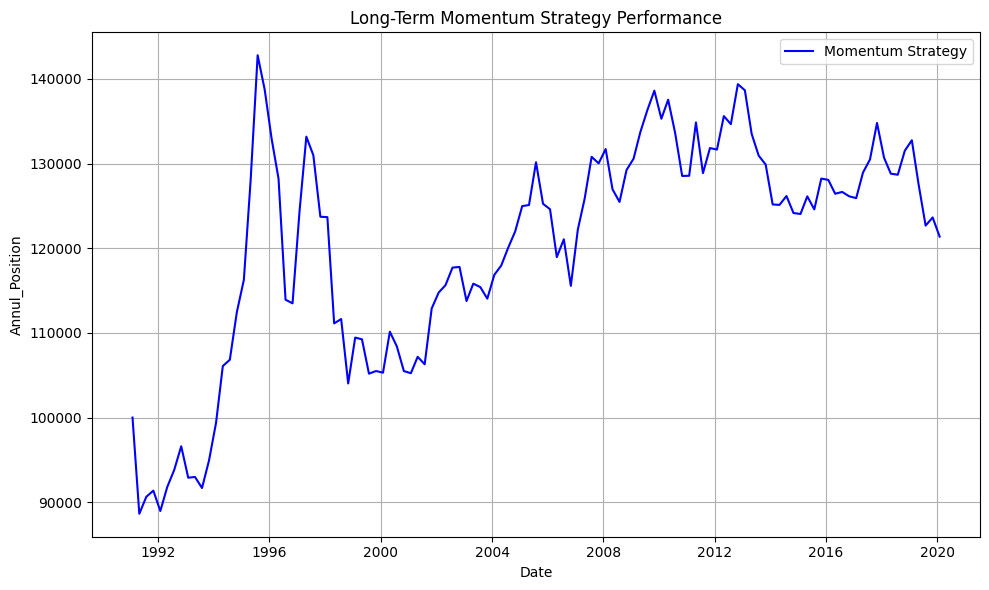

In [40]:
df = pd.DataFrame({'ThreeM_position': all_st_values})

# pd.Series(all_st_values).plot()
# len(cum_return_3M)
# cum_return_3M.keys()
import pandas as pd
import matplotlib.pyplot as plt
df['Date'] = pd.date_range(start='1991-01', periods=len(df), freq='3ME')


# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['ThreeM_position'], color='blue', label='Momentum Strategy')
plt.title('Long-Term Momentum Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Annul_Position')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()